# Text Classification using TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

C:\Users\shadowleaf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [5]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [6]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [7]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [8]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [9]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 4s 257us/step - loss: 0.6926 - acc: 0.5395 - val_loss: 0.6920 - val_acc: 0.5618
Epoch 2/100
15000/15000 [==============================] - 1s 43us/step - loss: 0.6909 - acc: 0.6088 - val_loss: 0.6900 - val_acc: 0.6274
Epoch 3/100
15000/15000 [==============================] - 1s 38us/step - loss: 0.6881 - acc: 0.6817 - val_loss: 0.6870 - val_acc: 0.6626
Epoch 4/100
15000/15000 [==============================] - 1s 37us/step - loss: 0.6839 - acc: 0.7278 - val_loss: 0.6823 - val_acc: 0.7357
Epoch 5/100
15000/15000 [==============================] - 1s 39us/step - loss: 0.6777 - acc: 0.7483 - val_loss: 0.6756 - val_acc: 0.7380
Epoch 6/100
15000/15000 [==============================] - 1s 37us/step - loss: 0.6690 - acc: 0.7629 - val_loss: 0.6666 - val_acc: 0.7511
Epoch 7/100
15000/15000 [==============================] - 1s 37us/step - loss: 0.6576 - acc: 0.7719 - val_loss: 0.6551 -

15000/15000 [==============================] - 1s 35us/step - loss: 0.1287 - acc: 0.9639 - val_loss: 0.2931 - val_acc: 0.8848
Epoch 60/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1258 - acc: 0.9649 - val_loss: 0.2954 - val_acc: 0.8831
Epoch 61/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1233 - acc: 0.9654 - val_loss: 0.2949 - val_acc: 0.8845
Epoch 62/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1202 - acc: 0.9670 - val_loss: 0.2957 - val_acc: 0.8839
Epoch 63/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1176 - acc: 0.9683 - val_loss: 0.2969 - val_acc: 0.8829
Epoch 64/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1150 - acc: 0.9687 - val_loss: 0.2980 - val_acc: 0.8836
Epoch 65/100
15000/15000 [==============================] - 1s 34us/step - loss: 0.1127 - acc: 0.9697 - val_loss: 0.2990 - val_acc: 0.8827
Epoch 66/100
15000/15000 [==============

In [17]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 2s 65us/step
[0.39667200314044954, 0.86216]


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

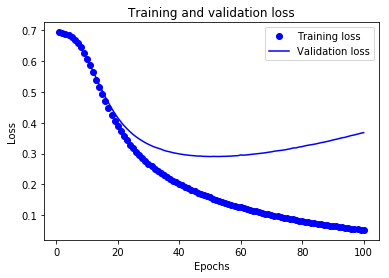

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

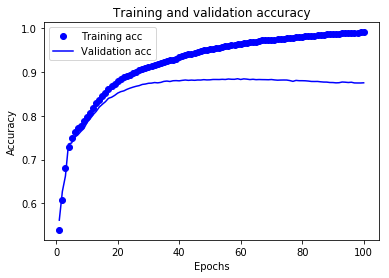

In [20]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()